In [1]:
import os 
from collections import defaultdict
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from pycorr import TwoPointCorrelationFunction, TwoPointEstimator, NaturalTwoPointEstimator, utils, setup_logging 
# To activate logging
#setup_logging()

# use 4Mpc/h binning

# Pycorr


In [2]:
def mean_xi(results_dir, zmin=0.6, zmax=0.8):
    fns = glob(f"{results_dir}/Xi_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph*_zmin{zmin}_zmax{zmax}.npy")
    #phs = [i for i in range(len(fns))]
    print(f'mocks in zbin {zmin}<z<{zmax} '+str(len(fns)))
    ells = (0, 2, 4)

    # (monopole, quadruple, hexadecapole)
    m = defaultdict(list)
    #for ph in phs:
    for fn in fns:
        #print(fn)
        #print(f'ph={ph:003d}')
        #fn = f"{results_dir}/Xi_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin{zmin}_zmax{zmax}.npy"
        result = TwoPointCorrelationFunction.load(fn)
        s, xiell = result[::4](ells=ells, return_sep=True)
        m['monopole'].append(xiell[0])
        m['quadrupole'].append(xiell[1])
        m['hexadecapole'].append(xiell[2])

    mean_0 = np.array(m['monopole']).mean(axis=0)
    mean_2 = np.array(m['quadrupole']).mean(axis=0)
    mean_4 = np.array(m['hexadecapole']).mean(axis=0)
    
    return (s, mean_0, mean_2, mean_4)

In [3]:
cont_results_dir = '/global/cscratch1/sd/arosado/test_sysnet/contaminated_mocks/results_pycorr'
corr_results_dir = '/global/cscratch1/sd/arosado/test_sysnet/contaminated_mocks/results_pycorr_corrected'
null_results_dir = '/global/cscratch1/sd/arosado/test_sysnet/null_mocks/results_pycorr'

mocks in zbin 0.6<z<0.8 25
mocks in zbin 0.6<z<0.8 25
mocks in zbin 0.6<z<0.8 25


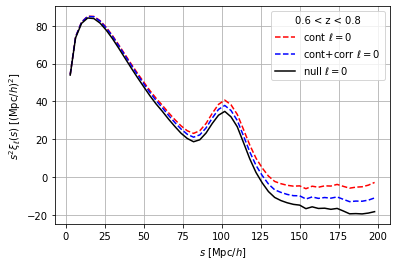

In [7]:
ax = plt.gca()
ell = 0
zmin,zmax = 0.6,0.8

dirs = [cont_results_dir, corr_results_dir, null_results_dir]
labels = ['cont $\ell = {:d}$'.format(ell), 'cont+corr $\ell = {:d}$'.format(ell), 'null $\ell = {:d}$'.format(ell)]
colors = ['r', 'b', 'k']
ls = ['--','--','-']
for i, dir_ in enumerate(dirs):
    r = mean_xi(dir_, zmin=zmin, zmax=zmax)
    kw = dict(label=f'{labels[i]}', color=colors[i], ls=ls[i])
    plt.plot(r[0], r[0]**2 * r[1], **kw)
    
ax.legend(title=f'{zmin} < z < {zmax}')
ax.grid(True)
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$s^{2} \xi_{\ell}(s)$ [$(\mathrm{Mpc}/h)^{2}$]')

fn = os.path.join(f'xi_mean_ell{ell}.png')
plt.savefig(fn, facecolor='white',bbox_inches='tight', pad_inches=0.1, dpi=200)

plt.show()

In [3]:
results_dir = cont_results_dir 
phs = [i for i in range(25)]
ells = (0, 2, 4)
zmin,zmax = 0.6,0.8

# (monopole, quadruple, hexadecapole)
m = defaultdict(list)
for ph in phs:
    #print(f'ph={ph:003d}')
    fn = os.path.join(results_dir, f'Xi_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin{zmin}_zmax{zmax}.npy')
    result = TwoPointCorrelationFunction.load(fn)
    s, xiell = result[::4](ells=ells, return_sep=True)
    m['monopole'].append(xiell[0])
    m['quadrupole'].append(xiell[1])
    m['hexadecapole'].append(xiell[2])

mean_0 = np.array(m['monopole']).mean(axis=0)
mean_2 = np.array(m['quadrupole']).mean(axis=0)
mean_4 = np.array(m['hexadecapole']).mean(axis=0)

/global/homes/a/arosado/.conda/envs/regressis/lib/python3.8/site-packages/Corrfunc/utils.py:1115: UserWarning: Warning: Cray hugepages has a bug that may crash Corrfunc. You might be able to fix such a crash with `module unload craype-hugepages2M` (see https://github.com/manodeep/Corrfunc/issues/245 for details)
  warnings.warn('Warning: Cray hugepages has a bug that may crash '


In [6]:
results_dir = corr_results_dir
phs = [i for i in range(25)]
# (monopole, quadruple, hexadecapole)
m = defaultdict(list)
for ph in phs:
    #print(f'ph={ph:003d}')
    fn = os.path.join(results_dir, f'Xi_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin{zmin}_zmax{zmax}.npy')
    result = TwoPointCorrelationFunction.load(fn)
    s, xiell = result[::4](ells=ells, return_sep=True)
    m['monopole'].append(xiell[0])
    m['quadrupole'].append(xiell[1])
    m['hexadecapole'].append(xiell[2])

corr_mean_0 = np.array(m['monopole']).mean(axis=0)
corr_mean_2 = np.array(m['quadrupole']).mean(axis=0)
corr_mean_4 = np.array(m['hexadecapole']).mean(axis=0)

FileNotFoundError: [Errno 2] No such file or directory: '/global/cscratch1/sd/arosado/test_sysnet/contaminated_mocks/results_pycorr_corrected/Xi_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph022_zmin0.4_zmax0.6.npy'

In [5]:
results_dir = null_results_dir
phs = [i for i in range(25)]
# (monopole, quadruple, hexadecapole)
m = defaultdict(list)
for ph in phs:
    #print(f'ph={ph:003d}')
    fn = os.path.join(results_dir, f'Xi_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin{zmin}_zmax{zmax}.npy')
    result = TwoPointCorrelationFunction.load(fn)
    s, xiell = result[::4](ells=ells, return_sep=True)
    m['monopole'].append(xiell[0])
    m['quadrupole'].append(xiell[1])
    m['hexadecapole'].append(xiell[2])

null_mean_0 = np.array(m['monopole']).mean(axis=0)
null_mean_2 = np.array(m['quadrupole']).mean(axis=0)
null_mean_4 = np.array(m['hexadecapole']).mean(axis=0)

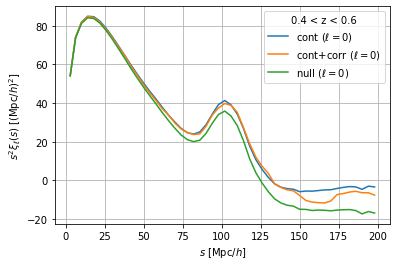

In [6]:
ax = plt.gca()
ax.plot(s, s**2 * mean_0, label=r'cont ($\ell = {:d})$'.format(ells[0]))
#ax.plot(s, s**2 * mean_2, label=r'$\ell = {:d}$'.format(ells[1]))
#ax.plot(s, s**2 * mean_4, label=r'$\ell = {:d}$'.format(ells[2]))

ax.plot(s, s**2 * corr_mean_0, label=r'cont+corr ($\ell = {:d})$'.format(ells[0]))

#ax.plot(s, s**2 * xiell[0], label=r'null ($\ell = {:d})$'.format(ells[0]))
ax.plot(s, s**2 * null_mean_0, label=r'null ($\ell = {:d})$'.format(ells[0]))
ax.legend(title=f'{zmin} < z < {zmax}')
ax.grid(True)
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$s^{2} \xi_{\ell}(s)$ [$(\mathrm{Mpc}/h)^{2}$]')

fn = os.path.join("", f'LRG_pycorr_zmin{zmin}_zmax{zmax}.png')
#plt.savefig(fn, facecolor='white',bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

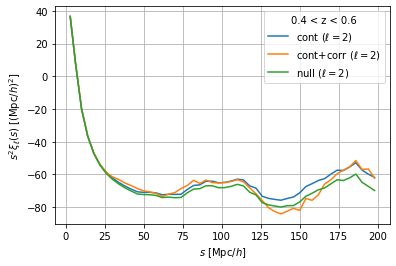

In [7]:
ax = plt.gca()
ax.plot(s, s**2 * mean_2, label=r'cont ($\ell = {:d})$'.format(ells[1]))

ax.plot(s, s**2 * corr_mean_2, label=r'cont+corr ($\ell = {:d})$'.format(ells[1]))

ax.plot(s, s**2 * null_mean_2, label=r'null ($\ell = {:d})$'.format(ells[1]))
ax.legend(title=f'{zmin} < z < {zmax}')
ax.grid(True)
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$s^{2} \xi_{\ell}(s)$ [$(\mathrm{Mpc}/h)^{2}$]')

fn = os.path.join("", f'LRG_pycorr_zmin{zmin}_zmax{zmax}.png')
#plt.savefig(fn, facecolor='white',bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

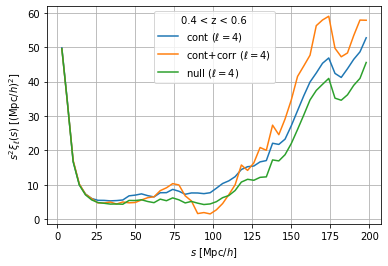

In [8]:
ax = plt.gca()
ax.plot(s, s**2 * mean_4, label=r'cont ($\ell = {:d})$'.format(ells[2]))

ax.plot(s, s**2 * corr_mean_4, label=r'cont+corr ($\ell = {:d})$'.format(ells[2]))

ax.plot(s, s**2 * null_mean_4, label=r'null ($\ell = {:d})$'.format(ells[2]))
ax.legend(title=f'{zmin} < z < {zmax}')
ax.grid(True)
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$s^{2} \xi_{\ell}(s)$ [$(\mathrm{Mpc}/h)^{2}$]')

fn = os.path.join("", f'LRG_pycorr_zmin{zmin}_zmax{zmax}.png')
#plt.savefig(fn, facecolor='white',bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()

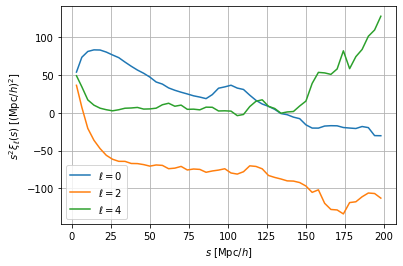

In [18]:
ph = 0
null_fn = f'/global/cscratch1/sd/arosado/test_sysnet/null_mocks/results_pycorr/Xi_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin0.4_zmax0.6.npy'
null_result = TwoPointCorrelationFunction.load(null_fn)

# Let us project to multipoles (monopole, quadruple, hexadecapole)
ells = (0, 2, 4)
s, xiell = null_result[::4](ells=ells, return_sep=True)
ax = plt.gca()
for ill, ell in enumerate(ells):
    ax.plot(s, s**2 * xiell[ill], label=r'$\ell = {:d}$'.format(ell))
ax.legend()
ax.grid(True)
ax.set_xlabel(r'$s$ [$\mathrm{Mpc}/h$]')
ax.set_ylabel(r'$s^{2} \xi_{\ell}(s)$ [$(\mathrm{Mpc}/h)^{2}$]')
plt.show()

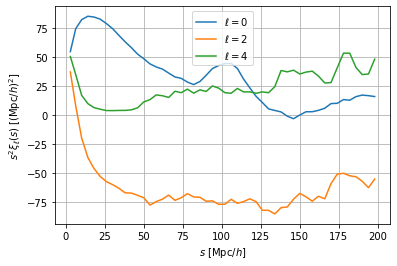

In [9]:
result[::4].plot(ells=(0, 2, 4));

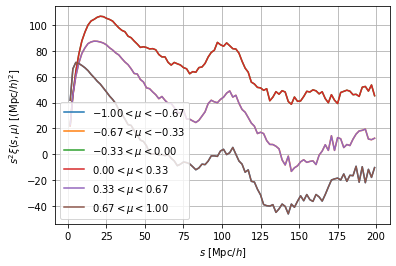

In [5]:
result[::2].plot(wedges=(-1., -2. / 3, -1. / 3, 0., 1. / 3, 2. / 3, 1.));
# or, in case of rppi, e.g. pimax = 40

# Pypower

In [2]:
from pypower import CatalogMesh, MeshFFTPower, CatalogFFTPower, PowerSpectrumStatistics, utils

In [3]:
ph = 11
zmin,zmax = 0.6,0.8 
cont_pk_results_dir = '/global/cscratch1/sd/arosado/test_sysnet/contaminated_mocks/results_pypower_1024'
corr_pk_results_dir = '/global/cscratch1/sd/arosado/test_sysnet/contaminated_mocks/results_pypower_1024_corrected'
null_pk_results_dir = '/global/cscratch1/sd/arosado/test_sysnet/null_mocks/results_pypower_1024'

In [4]:
def mean_pk(results_dir, zmin=0.6, zmax=0.8):
    phs = [i for i in range(25)]
    ells = (0, 2, 4)

    # (monopole, quadruple, hexadecapole)
    m = defaultdict(list)
    for ph in phs:
        #print(f'ph={ph:003d}')
        fn = f"{results_dir}/Pk_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin{zmin}_zmax{zmax}.npy"
        result = CatalogFFTPower.load(fn)
        k, pk = result.poles[::4](ell=ells, return_k=True, complex=False)
        m['monopole'].append(pk[0])
        m['quadrupole'].append(pk[1])
        m['hexadecapole'].append(pk[2])

    mean_0 = np.array(m['monopole']).mean(axis=0)
    mean_2 = np.array(m['quadrupole']).mean(axis=0)
    mean_4 = np.array(m['hexadecapole']).mean(axis=0)
    
    return (k, mean_0, mean_2, mean_4)

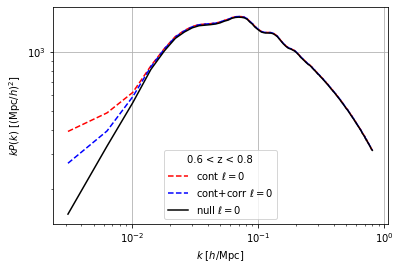

In [11]:
ax = plt.gca()
ell = 0

dirs = [cont_pk_results_dir, corr_pk_results_dir, null_pk_results_dir]
labels = ['cont $\ell = {:d}$'.format(ell), 'cont+corr $\ell = {:d}$'.format(ell), 'null $\ell = {:d}$'.format(ell)]
colors = ['r', 'b', 'k']
ls = ['--','--','-']
for i, dir_ in enumerate(dirs):
    r = mean_pk(dir_)
    kw = dict(label=f'{labels[i]}', color=colors[i], ls=ls[i])
    plt.plot(r[0], r[0]*r[1], **kw)
    
ax.legend(title=f'{zmin} < z < {zmax}')
#plt.ylim(100,1e5)
plt.xscale('log')
plt.yscale('log')
ax.grid(True)
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

fn = os.path.join(f'pk_mean_ell{ell}.png')
#plt.savefig(fn, facecolor='white',bbox_inches='tight', pad_inches=0.1, dpi=200)

plt.show()

In [67]:
cont_fn = f"{cont_pk_results_dir}/Pk_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin{zmin}_zmax{zmax}.npy"
cont_result = CatalogFFTPower.load(cont_fn)

corr_fn = f"{corr_pk_results_dir}/Pk_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin{zmin}_zmax{zmax}.npy"
corr_result = CatalogFFTPower.load(corr_fn)

null_fn = f"{null_pk_results_dir}/Pk_cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}_zmin{zmin}_zmax{zmax}.npy"
null_result = CatalogFFTPower.load(null_fn)

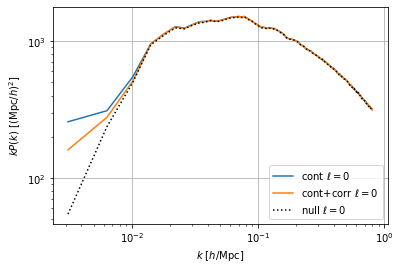

In [68]:
cont_poles = cont_result.poles[::4]
corr_poles = corr_result.poles[::4]
null_poles = null_result.poles[::4]
ell=0

k, p = cont_poles(ell=ell, return_k=True, complex=False)
ax = plt.gca()

ax.plot(k, cont_poles(ell=ell, complex=False)*k, label=r'cont $\ell = {:d}$'.format(ell))
ax.plot(k, corr_poles(ell=ell, complex=False)*k, label=r'cont+corr $\ell = {:d}$'.format(ell))
ax.plot(k, null_poles(ell=ell, complex=False)*k, ls=':',color='k', label=r'null $\ell = {:d}$'.format(ell))

ax.legend()
#plt.ylim(100,1e5)
plt.xscale('log')
plt.yscale('log')
ax.grid(True)
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

plt.show()

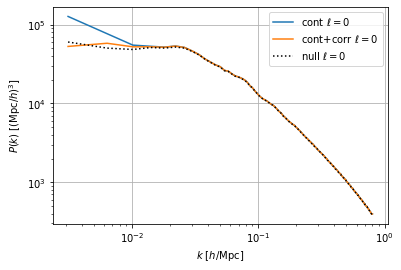

In [16]:
cont_poles = cont_result.poles[::4]
corr_poles = corr_result.poles[::4]
null_poles = null_result.poles[::4]
ell=0
ax = plt.gca()

ax.plot(*cont_poles(ell=ell, return_k=True, complex=False), label=r'cont $\ell = {:d}$'.format(ell))
ax.plot(*corr_poles(ell=ell, return_k=True, complex=False), label=r'cont+corr $\ell = {:d}$'.format(ell))
ax.plot(*null_poles(ell=ell, return_k=True, complex=False), ls=':',color='k', label=r'null $\ell = {:d}$'.format(ell))

ax.legend()
#plt.ylim(100,1e5)
plt.xscale('log')
plt.yscale('log')
ax.grid(True)
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
ax.set_ylabel(r'$P(k)$ [$(\mathrm{Mpc}/h)^{3}$]')
plt.show()

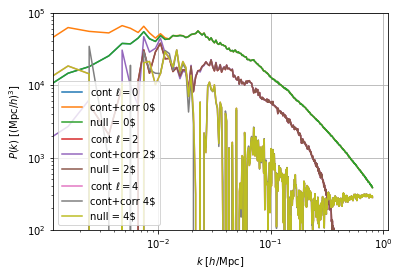

In [20]:
cont_poles = cont_result.poles
corr_poles = corr_result.poles
null_poles = null_result.poles
#print('Shot noise is {:.4f}.'.format(cont_poles.shotnoise)) # cross-correlation, shot noise is 0.
#print('Normalization is {:.4f}.'.format(cont_poles.wnorm))
ax = plt.gca()
#for ill, ell in enumerate(cont_poles.ells):
    # Calling poles() removes shotnoise for ell == 0 by default;
    # Pass remove_shotnoise = False if you do not want to;
    # See get_power() for all arguments
    ax.plot(*cont_poles(ell=ell, return_k=True, complex=False), label=r'cont $\ell = {:d}$'.format(ell))
    ax.plot(*corr_poles(ell=ell, return_k=True, complex=False), label=r'cont+corr {:d}$'.format(ell))
    ax.plot(*null_poles(ell=ell, return_k=True, complex=False), label=r'null = {:d}$'.format(ell))
ax.legend()
plt.ylim(100,1e5)
plt.xscale('log')
plt.yscale('log')
ax.grid(True)
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
ax.set_ylabel(r'$P(k)$ [$(\mathrm{Mpc}/h)^{3}$]')
plt.show()

In [3]:
import sys
sys.path.append("/global/homes/a/arosado/sysgen/")
from utils import normalize_selection_func, make_hp, read_mock, project2hp, apply_mock_mask, radec2hpix
from astropy.table import Table
import healpy as hp

import logging
logger = logging.getLogger("Notebook")

# Set cosmology to transform redshift to distance
from cosmoprimo.fiducial import DESI
distance = DESI(engine='class').comoving_radial_distance  

In [4]:
phs = [i for i in range(25)]
ph = 0
nside=256

base_dir = os.path.join(os.getenv('CSCRATCH'), 'test_sysnet')
cont_mocks_tables_dir = os.path.join(base_dir, 'contaminated_mocks_tables')
cont_mock_dir = os.path.join(base_dir, "contaminated_mocks")
null_mock_dir = os.path.join(base_dir, "null_mocks")

#for ph in phs:
print(f'ph {ph:003d} of {24:003d}')
# read data used for NN
mock_cont_fn = os.path.join(cont_mock_dir, f'cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}.fits')
mock_null_fn = os.path.join(null_mock_dir, f'cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}.fits')

# read NN results, convert to hpmap
mock_dir = os.path.join(cont_mocks_tables_dir, f'cutsky_LRG_z0.800_AbacusSummit_base_c000_ph{ph:003d}')
nn_table = Table.read(f'{mock_dir}/nn-weights.fits')
npred = make_hp(np.mean(nn_table['weight'],axis=1), nn_table['hpix'], nside) # take mean along snapshots

ph 000 of 024


In [5]:
nn_normed = normalize_selection_func(npred,norm_method='mean')

using mean for normalizing selection function


In [6]:
# collect randoms
randoms_path = '/global/cfs/cdirs/desi/cosmosim/FirstGenMocks/AbacusSummit/CutSky/LRG/z0.800/cutsky_LRG_random_S1000_1X.fits'
randoms = apply_mock_mask(randoms_path, main=0, nz=0, Y5=1, sv3=0)

# project randoms to healpix map
randoms_hmap, randoms_pix_number = project2hp(nside, randoms, return_hpix=True)
#hp.mollview(randoms_hmap)

applying mask: main=0, nz=0, Y5=1, sv3=0


In [7]:
%%time
# get uncontaminated mock and contaminated mock (contaminated mock by downsampling), and project them to healpix maps
mock_null, mock_null_pix_number = read_mock(mock_null_fn, nside=nside, return_hpix=True)
mock_null_hmap = project2hp(nside, mock_null)
null_mask = make_hp(1.0, mock_null_pix_number, nside) > 0.5

mock_cont, mock_cont_pix_number = read_mock(mock_cont_fn, nside=nside, return_hpix=True)
mock_cont_hmap = project2hp(nside, mock_cont)

reading /global/cscratch1/sd/arosado/test_sysnet/null_mocks/cutsky_LRG_z0.800_AbacusSummit_base_c000_ph000.fits
reading /global/cscratch1/sd/arosado/test_sysnet/contaminated_mocks/cutsky_LRG_z0.800_AbacusSummit_base_c000_ph000.fits


CPU times: user 2.1 s, sys: 902 ms, total: 3.01 s
Wall time: 3.22 s


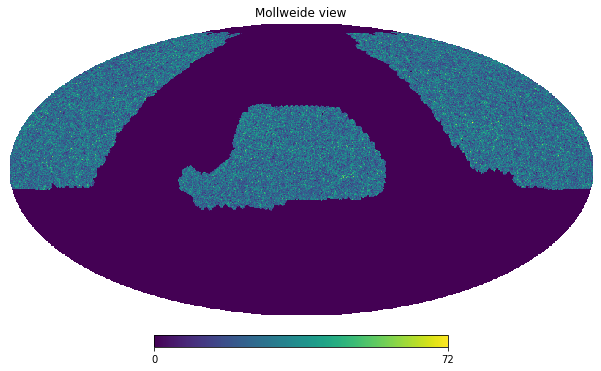

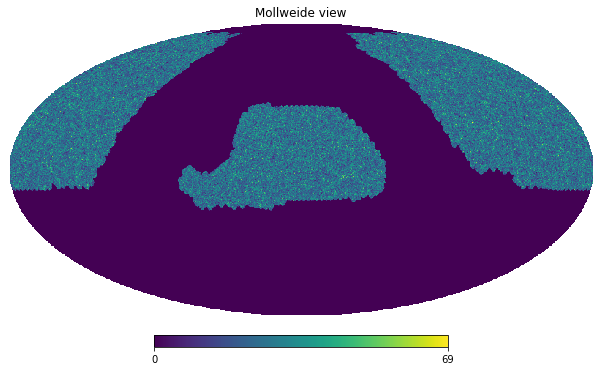

In [13]:
hp.mollview(mock_cont_hmap)
plt.show()

hp.mollview(mock_null_hmap)
plt.show()

In [8]:
#function for computing power spectrum by Edmond
def compute_power(data, randoms, data_weights=None, randoms_weights=None, ells=(0, 2, 4), edges=None, return_plot=False, nmesh=512):
    if edges is None:
        logger.info('Use default edges: np.linspace(0, 0.3, 81)')
        edges = np.linspace(0, 0.3, 81)
    
    # set data weights
    if data_weights is None:
        data_weights = np.ones(data['RA'].size)
    
    # set randoms weights
    if randoms_weights is None:
        randoms_weights = np.ones(randoms['RA'].size)
    
    result = CatalogFFTPower(data_positions1=[data['RA'], data['DEC'], distance(data['Z'])], data_weights1=data_weights,
                             randoms_positions1=[randoms['RA'], randoms['DEC'], distance(randoms['Z'])], randoms_weights1=randoms_weights,
                             edges=edges, ells=ells, interlacing=2, boxsize=None, boxpad=4, nmesh=nmesh, resampler='tsc',
                             los=None, position_type='rdd', mpiroot=0)
    if return_plot:
        return result.poles.k, result.poles

In [9]:
1/nn_normed[mock_cont_pix_number]

/tmp/ipykernel_63289/1948648135.py:1: RuntimeWarning: divide by zero encountered in divide
  1/nn_normed[mock_cont_pix_number]


array([0.96244944, 0.96244944, 0.95497596, ..., 1.02710526, 1.03769819,
       1.04005566])

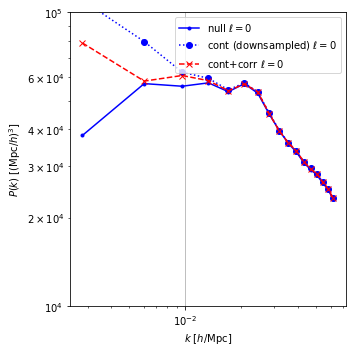

CPU times: user 53.7 s, sys: 8.64 s, total: 1min 2s
Wall time: 1min 2s


In [10]:
%%time 
regions = ['']#['North', 'South', 'Des']
z_min, z_max = 0.4, 0.6

#plt.figure(figsize=(5, 6))
fig = plt.gcf()
fig.set_size_inches(5, 5)

mask = (mock_cont_hmap>0) & (mock_null_hmap>0)

j = 0
for region in regions:
    sel_in_randoms =  (randoms['Z'] <= z_max) & (randoms['Z'] >= z_min) # & mask[randoms_pix_number] 
    sel_in_mock_null = (mock_null['Z'] <= z_max) & (mock_null['Z'] >= z_min) # & mask[mock_null_pix_number] 
    sel_in_mock_cont = (mock_cont['Z'] <= z_max) & (mock_cont['Z'] >= z_min) # & mask[mock_cont_pix_number] 
    
    ra, dec = mock_cont[sel_in_mock_cont]['RA'], mock_cont[sel_in_mock_cont]['DEC']
    hpix_for_nn = radec2hpix(nside, ra, dec)
    nn = nn_normed[hpix_for_nn]
    nn[nn==0] = 1
    w_corr = 1/nn 
    #nn = nn_normed[hpix_for_nn]
    
    k, poles = compute_power(mock_null[sel_in_mock_null], randoms[sel_in_randoms], ells=(0), return_plot=True, nmesh=256)
    k2, poles2 = compute_power(mock_cont[sel_in_mock_cont], randoms[sel_in_randoms], ells=(0), return_plot=True, nmesh=256)
    k3, poles3 = compute_power(mock_cont[sel_in_mock_cont], randoms[sel_in_randoms], ells=(0), data_weights=w_corr, return_plot=True, nmesh=256)

    #plt.subplot(131+j)
    j += 1
    #print(321+j)
    color = ['b', 'r', 'g']
    for i, ell in enumerate([poles.ells[0]]):
        plt.plot(k, poles(ell=ell, complex=False), marker='.', color=color[i], ls='-', label='null $\ell = {:d}$'.format(ell))
        plt.plot(k, poles2(ell=ell, complex=False), marker='o', color=color[i], ls=':', label='cont (downsampled) $\ell = {:d}$'.format(ell))
        plt.plot(k, poles3(ell=ell, complex=False), marker='x', color='r', ls='--', label='cont+corr $\ell = {:d}$'.format(ell))
    plt.legend(title=region, loc='upper right')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(1e4, 1e5)
    plt.xlabel('$k$ [$h/\mathrm{Mpc}$]')
    plt.ylabel(r'$P(k)$ [$(\mathrm{Mpc}/h)^{3}$]')
    plt.grid(True)

plt.tight_layout()
#plt.savefig('Mock_LRG_power_test5.pdf')
#plt.savefig('Mock_LRG_power_test5.png', dpi=200, facecolor='white')
plt.show()